In [69]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import scipy.sparse as sp
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", message="X has feature names, but LinearRegression was fitted without feature names")



# Set Random Seed for all
np.random.seed(42)

In [70]:
PMGSY_path = 'Datasets/PMGSY.csv'

# Load the dataset
PMGSY = pd.read_csv(PMGSY_path)
PMGSY

,STATE_NAME,DISTRICT_NAME,PMGSY_SCHEME,NO_OF_ROAD_WORK_SANCTIONED,NO_OF_BRIDGES_SANCTIONED,NO_OF_ROAD_WORKS_COMPLETED,NO_OF_BRIDGES_COMPLETED,NO_OF_ROAD_WORKS_BALANCE,NO_OF_BRIDGES_BALANCE,LENGTH_OF_ROAD_WORK_SANCTIONED_KM,COST_OF_WORKS_SANCTIONED_LAKHS,LENGTH_OF_ROAD_WORK_COMPLETED_KM,EXPENDITURE_OCCURED_LAKHS,LENGTH_OF_ROAD_WORK_BALANCE_KM
0,Andaman And Nicobar,North and Middle Andaman,PMGSY-I,32,0,32,0,0,0,60.169,24.69080,59.190,19.5518,0.000
1,Andaman And Nicobar,South Andaman,PMGSY-I,32,0,31,0,1,0,40.146,18.53750,39.287,11.6894,0.541
2,Andhra Pradesh,Alluri Sitharama Raju,PMGSY-I,472,17,467,14,5,3,1952.378,775.69920,1809.482,697.8523,24.340
3,Andhra Pradesh,Alluri Sitharama Raju,PMGSY-II,2,0,2,0,0,0,14.000,8.93850,12.395,6.4294,0.000
4,Andhra Pradesh,Anakapalli,PMGSY-I,195,8,195,8,0,0,483.715,158.07450,465.672,140.3410,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,West Bengal,Purba Medinipur,PMGSY-II,11,2,11,2,0,0,101.850,82.46289,101.408,77.8186,0.000
2253,West Bengal,Purulia,PMGSY-I,415,0,415,0,0,0,2217.411,870.67731,2208.023,672.5263,0.000
2254,West Bengal,Siliguri M.P.,PMGSY-I,94,1,94,1,0,0,354.167,121.07113,352.332,110.1007,0.000
2255,West Bengal,Siliguri M.P.,PMGSY-II,8,0,8,0,0,0,35.022,24.46831,34.852,19.3307,0.000


In [71]:
PMGSY.columns

Index(['STATE_NAME', 'DISTRICT_NAME', 'PMGSY_SCHEME',
       'NO_OF_ROAD_WORK_SANCTIONED', 'NO_OF_BRIDGES_SANCTIONED',
       'NO_OF_ROAD_WORKS_COMPLETED', 'NO_OF_BRIDGES_COMPLETED',
       'NO_OF_ROAD_WORKS_BALANCE', 'NO_OF_BRIDGES_BALANCE',
       'LENGTH_OF_ROAD_WORK_SANCTIONED_KM', 'COST_OF_WORKS_SANCTIONED_LAKHS',
       'LENGTH_OF_ROAD_WORK_COMPLETED_KM', 'EXPENDITURE_OCCURED_LAKHS',
       'LENGTH_OF_ROAD_WORK_BALANCE_KM'],
      dtype='object')

In [72]:
PMGSY_subset = PMGSY[[ 'NO_OF_ROAD_WORK_SANCTIONED', 'NO_OF_BRIDGES_SANCTIONED','LENGTH_OF_ROAD_WORK_SANCTIONED_KM', 'COST_OF_WORKS_SANCTIONED_LAKHS']]
PMGSY_subset

,NO_OF_ROAD_WORK_SANCTIONED,NO_OF_BRIDGES_SANCTIONED,LENGTH_OF_ROAD_WORK_SANCTIONED_KM,COST_OF_WORKS_SANCTIONED_LAKHS
0,32,0,60.169,24.69080
1,32,0,40.146,18.53750
2,472,17,1952.378,775.69920
3,2,0,14.000,8.93850
4,195,8,483.715,158.07450
...,...,...,...,...
2252,11,2,101.850,82.46289
2253,415,0,2217.411,870.67731
2254,94,1,354.167,121.07113
2255,8,0,35.022,24.46831


# Actual Data

In [73]:
x = PMGSY_subset.drop('COST_OF_WORKS_SANCTIONED_LAKHS', axis=1)
y = PMGSY_subset['COST_OF_WORKS_SANCTIONED_LAKHS']

# Perform linear regression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

# Calculate and print train and test MSE
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)


# Calculate and print R-squared
train_r2 = model.score(x_train, y_train)
test_r2 = model.score(x_test, y_test)

train_r2, test_r2

(0.8643951249186212, 0.8848168432113658)

In [74]:
type(x_train)

pandas.core.frame.DataFrame

# Reduced data

Since we have enough rows which only one column, we can use JL to reduce the number of rows.

In [75]:
def generate_sparse_jl_matrix(d, n, p=10, sparsity=0.01, random_state=None):
    """
    Generate a sparse random Johnson-Lindenstrauss (JL) matrix of size (p*d x n).
    
    Parameters:
    - d: int, number of features in the original data
    - n: int, number of samples in the original data
    - p: int, number of rows in the JL matrix (default: 10 - given)
    - sparsity: float, fraction of non-zero entries in the matrix (between 0 and 1) (default: 0.01 => 1% of the total entries are non-zero)
    - random_state: int or None, seed for reproducibility (optional)
    
    Returns:
    - M: scipy.sparse.csr_matrix, the sparse JL matrix of shape (p*d x n)
    """
    if random_state is not None:
        np.random.seed(random_state)

    # Number of non-zero entries based on sparsity
    num_non_zero_entries = int(sparsity * p * d * n)
    
    # Generate random row and column indices for non-zero entries
    row_indices = np.random.choice(p*d, num_non_zero_entries)
    col_indices = np.random.choice(n, num_non_zero_entries)
    
    # Generate Gaussian-distributed values for non-zero entries
    values = np.random.randn(num_non_zero_entries)
    
    # Create the sparse matrix in Compressed Sparse Row (CSR) format
    M = sp.csr_matrix((values, (row_indices, col_indices)), shape=(p*d, n))
    
    # Scale the non-zero entries by 1/sqrt(d) to preserve distances
    M = M / np.sqrt(d)
    
    return M

In [76]:
n,d = x_train.shape
p = 10
sparsity = 0.01
print('Number of features in the original data (d):', d)
print('Number of samples in the original data (n):', n)
print('Number of rows in the JL matrix (p):', p)
print('Sparsity of the JL matrix:', sparsity)

Number of features in the original data (d): 3
Number of samples in the original data (n): 1805
Number of rows in the JL matrix (p): 10
Sparsity of the JL matrix: 0.01


In [77]:
p =10
M = generate_sparse_jl_matrix(d, n, p, sparsity, random_state=42)
print('Shape of the JL matrix:', M.shape)

print('Shape of X_train:', x_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_test:', x_test.shape)
print('Shape of y_test:', y_test.shape)

# Compute the projected data
E = M.dot(x_train.to_numpy())
print('Shape of the projected X_train:', E.shape)
z = M.dot(y_train.values.reshape(-1, 1))
print('Shape of the projected y_train:', z.shape)

# Perform linear regression on the projected data
lr = LinearRegression()
lr.fit(E, z)

# Print the model parameters
print('Coefficients:', lr.coef_)

# Calculate and print train and test R-squared
train_r2_proj = lr.score(E, z)
test_r2_proj = lr.score(x_test, y_test)

train_r2_proj, test_r2_proj

Shape of the JL matrix: (30, 1805)
Shape of X_train: (1805, 3)
Shape of y_train: (1805,)
Shape of X_test: (452, 3)
Shape of y_test: (452,)
Shape of the projected X_train: (30, 3)
Shape of the projected y_train: (30, 1)
Coefficients: [[-0.92038981  2.48006128  0.64115376]]


(0.9486853961964185, 0.8290842845006139)

In [108]:
p =175

M = generate_sparse_jl_matrix(d, n, p, sparsity, random_state=42)
print('Shape of the JL matrix:', M.shape)

print('Shape of X_train:', x_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_test:', x_test.shape)
print('Shape of y_test:', y_test.shape)

# Compute the projected data
E = M.dot(x_train)
print('Shape of the projected X_train:', E.shape)
z = M.dot(y_train.values.reshape(-1, 1))
print('Shape of the projected y_train:', z.shape)

# Perform linear regression on the projected data
lr = LinearRegression()
lr.fit(E, z)

# Calculate and print train and test R-squared
train_r2_proj = lr.score(E, z)
test_r2_proj = lr.score(x_test, y_test)

train_r2_proj, test_r2_proj

Shape of the JL matrix: (525, 1805)
Shape of X_train: (1805, 3)
Shape of y_train: (1805,)
Shape of X_test: (452, 3)
Shape of y_test: (452,)
Shape of the projected X_train: (525, 3)
Shape of the projected y_train: (525, 1)


(0.891584481159606, 0.8851910698719041)

Best p value: 175
Train R² for best p: 0.891584481159606
Test R² for best p: 0.8851910698719041


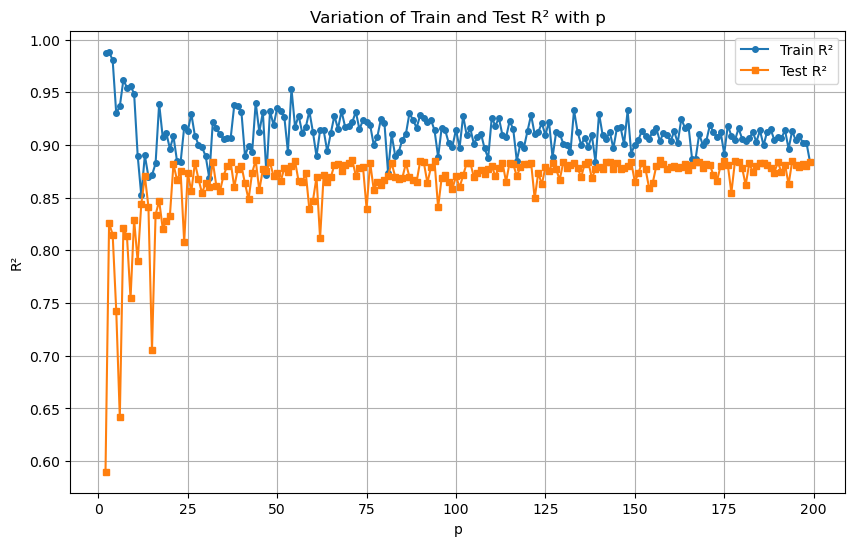

In [ ]:
# Initialize lists to store R2 scores
train_r2s = []
test_r2s = []

# Loop over values of p
p_values = range(2, 200)  # p from 1 to 100
for p in p_values:
    # Generate sparse JL matrix (assume function already exists)
    M = generate_sparse_jl_matrix(d, n, p, sparsity, random_state=42)

    # Project data
    E = M.dot(x_train)
    z = M.dot(y_train.values.reshape(-1, 1))

    # Perform linear regression
    lr = LinearRegression()
    lr.fit(E, z)

    # Calculate R2 scores
    train_r2s.append(lr.score(E, z))
    test_r2s.append(lr.score(x_test, y_test))


# Find the best p value
best_p = None
best_train_r2 = None
best_test_r2 = None
min_diff = float('inf')

for i, p in enumerate(p_values):
    diff = abs(train_r2s[i] - test_r2s[i]) # Minimize the difference between train and test R²
    if train_r2s[i] >= 0.89 and diff < min_diff: # 0.89 is the train R² for all rows of X_train
        best_p = p
        best_train_r2 = train_r2s[i]
        best_test_r2 = test_r2s[i]
        min_diff = diff

print(f"Best p value: {best_p}")
print(f"Train R² for best p: {best_train_r2}")
print(f"Test R² for best p: {best_test_r2}")


# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(p_values, train_r2s, label='Train R²', marker='o', markersize=4)
plt.plot(p_values, test_r2s, label='Test R²', marker='s', markersize=4)
plt.title('Variation of Train and Test R² with p')
plt.xlabel('p')
plt.ylabel('R²')
plt.grid(True)
plt.legend()
plt.show()

In [83]:
p =175

M = generate_sparse_jl_matrix(d, n, p, sparsity, random_state=42)
print('Shape of the JL matrix:', M.shape)

print('Shape of X_train:', x_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_test:', x_test.shape)
print('Shape of y_test:', y_test.shape)

# Compute the projected data
E = M.dot(x_train)
print('Shape of the projected X_train:', E.shape)
z = M.dot(y_train.values.reshape(-1, 1))
print('Shape of the projected y_train:', z.shape)

# Perform linear regression on the projected data
lr = LinearRegression()
lr.fit(E, z)

# Calculate and print train and test R-squared
train_r2_proj = lr.score(E, z)
test_r2_proj = lr.score(x_test, y_test)

train_r2_proj, test_r2_proj

Shape of the JL matrix: (525, 1805)
Shape of X_train: (1805, 3)
Shape of y_train: (1805,)
Shape of X_test: (452, 3)
Shape of y_test: (452,)
Shape of the projected X_train: (525, 3)
Shape of the projected y_train: (525, 1)


(0.891584481159606, 0.8851910698719041)

# Time Calculations

In [84]:
import time
from sklearn.linear_model import LinearRegression

p = 175

# Start timing
total_start_time = time.time()

M = generate_sparse_jl_matrix(d, n, p, sparsity, random_state=42)
print('Shape of the JL matrix:', M.shape)

print('Shape of X_train:', x_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_test:', x_test.shape)
print('Shape of y_test:', y_test.shape)

# Compute the projected data
projection_start_time = time.time()
E = M.dot(x_train)
print('Shape of the projected X_train:', E.shape)
z = M.dot(y_train.values.reshape(-1, 1))
print('Shape of the projected y_train:', z.shape)
projection_end_time = time.time()

# Perform linear regression on the projected data
regression_start_time = time.time()
lr = LinearRegression()
lr.fit(E, z)
regression_end_time = time.time()

# Calculate and print train and test R-squared
scoring_start_time = time.time()
train_r2_proj = lr.score(E, z)
test_r2_proj = lr.score(x_test, y_test)
scoring_end_time = time.time()

total_end_time = time.time()

# Print R-squared values
print('Train R-squared on projected data:', train_r2_proj)
print('Test R-squared on projected data:', test_r2_proj)

# Print timing information
print('Time for generating projections:', projection_end_time - projection_start_time, 'seconds')
print('Time for regression:', regression_end_time - regression_start_time, 'seconds')
print('Time for scoring:', scoring_end_time - scoring_start_time, 'seconds')
print('Total time:', total_end_time - total_start_time, 'seconds')

Shape of the JL matrix: (525, 1805)
Shape of X_train: (1805, 3)
Shape of y_train: (1805,)
Shape of X_test: (452, 3)
Shape of y_test: (452,)
Shape of the projected X_train: (525, 3)
Shape of the projected y_train: (525, 1)
Train R-squared on projected data: 0.891584481159606
Test R-squared on projected data: 0.8851910698719041
Time for generating projections: 0.0009965896606445312 seconds
Time for regression: 0.0009975433349609375 seconds
Time for scoring: 0.0029921531677246094 seconds
Total time: 0.006981611251831055 seconds


In [85]:
import time
from sklearn.linear_model import LinearRegression

# Start timing
total_start_time = time.time()

# Initialize and fit the model
fit_start_time = time.time()
model = LinearRegression()
model.fit(x_train, y_train)
fit_end_time = time.time()

# Predict on train and test data
predict_start_time = time.time()
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
predict_end_time = time.time()

# Calculate R-squared
r2_start_time = time.time()
train_r2 = model.score(x_train, y_train)
test_r2 = model.score(x_test, y_test)
r2_end_time = time.time()

total_end_time = time.time()

# Print R-squared values
print('Train R-squared:', train_r2)
print('Test R-squared:', test_r2)

# Print timing information
print('Time for model fitting:', fit_end_time - fit_start_time, 'seconds')
print('Time for predictions:', predict_end_time - predict_start_time, 'seconds')
print('Time for R-squared calculations:', r2_end_time - r2_start_time, 'seconds')
print('Total time:', total_end_time - total_start_time, 'seconds')


Train R-squared: 0.8643951249186212
Test R-squared: 0.8848168432113658
Time for model fitting: 0.0029900074005126953 seconds
Time for predictions: 0.0019941329956054688 seconds
Time for R-squared calculations: 0.003998279571533203 seconds
Total time: 0.008982419967651367 seconds


# Average Time taken

In [102]:
import time
from sklearn.linear_model import LinearRegression
import numpy as np

# Define the number of repetitions
num_repetitions = 10000

# Initialize accumulators for timing
total_fit_time = 0
total_predict_time = 0
total_r2_time = 0
total_total_time = 0

# Perform the process 100 times
for _ in range(num_repetitions):
    # Start timing
    total_start_time = time.time()

    # Initialize and fit the model
    fit_start_time = time.time()
    model = LinearRegression()
    model.fit(x_train, y_train)
    fit_end_time = time.time()


    # Calculate R-squared
    r2_start_time = time.time()
    train_r2 = model.score(x_train, y_train)
    test_r2 = model.score(x_test, y_test)
    r2_end_time = time.time()

    total_end_time = time.time()

    # Accumulate timings
    total_fit_time += (fit_end_time - fit_start_time)
    total_r2_time += (r2_end_time - r2_start_time)
    total_total_time += (total_end_time - total_start_time)

# Calculate average times
avg_fit_time = total_fit_time / num_repetitions
avg_r2_time = total_r2_time / num_repetitions
avg_total_time = total_total_time / num_repetitions

# Print average timing information
print('Without JL')
print('Number of repetitions:', num_repetitions)
print('Average time for fitting LR model:', avg_fit_time, 'seconds')
print('Average time for R-squared calculations:', avg_r2_time, 'seconds')
print('Average total time:', avg_total_time, 'seconds')


Without JL
Number of repetitions: 10000
Average time for fitting LR model: 0.0015155938148498536 seconds
Average time for R-squared calculations: 0.0029282801151275634 seconds
Average total time: 0.0044451739311218265 seconds


In [103]:
import time
from sklearn.linear_model import LinearRegression

p = 175

# Define the number of repetitions
num_repetitions = 10000

# Initialize accumulators for timing
total_projection_time = 0
total_regression_time = 0
total_scoring_time = 0
total_total_time = 0

# Perform the process 100 times
for _ in range(num_repetitions):
    # Start timing
    total_start_time = time.time()

    # Generate the JL matrix and project data
    projection_start_time = time.time()
    M = generate_sparse_jl_matrix(d, n, p, sparsity, random_state=42)
    E = M.dot(x_train)
    z = M.dot(y_train.values.reshape(-1, 1))
    projection_end_time = time.time()

    # Perform linear regression on the projected data
    regression_start_time = time.time()
    lr = LinearRegression()
    lr.fit(E, z)
    regression_end_time = time.time()

    # Calculate R-squared values
    scoring_start_time = time.time()
    train_r2_proj = lr.score(E, z)
    test_r2_proj = lr.score(x_test, y_test)
    scoring_end_time = time.time()

    total_end_time = time.time()

    # Accumulate timings
    total_projection_time += (projection_end_time - projection_start_time)
    total_regression_time += (regression_end_time - regression_start_time)
    total_scoring_time += (scoring_end_time - scoring_start_time)
    total_total_time += (total_end_time - total_start_time)

# Calculate average times
avg_projection_time_JL = total_projection_time / num_repetitions
avg_regression_time_JL = total_regression_time / num_repetitions
avg_scoring_time_JL = total_scoring_time / num_repetitions
avg_total_time_JL = total_total_time / num_repetitions

# Print average timing information
print('With JL')
print('Number of repetitions:', num_repetitions)
print('Average time for generating projections:', avg_projection_time_JL, 'seconds')
print('Average time for fitting LR model:', avg_regression_time_JL, 'seconds')
print('Average time for R-squared calculations:', avg_scoring_time_JL, 'seconds')
print('Average total time:', avg_total_time_JL, 'seconds')

With JL
Number of repetitions: 10000
Average time for generating projections: 0.001358310055732727 seconds
Average time for fitting LR model: 0.0006876371145248413 seconds
Average time for R-squared calculations: 0.002062161111831665 seconds
Average total time: 0.004109419322013855 seconds


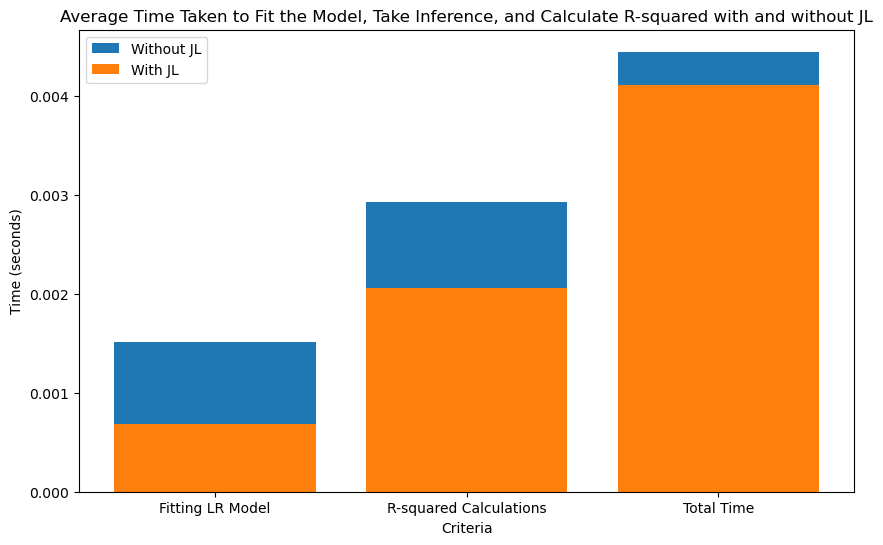

In [ ]:
# Compare the time statistics (avg time to fit the model, avg time to take inference of the model, total avg time) with and without JL through a plot
plt.figure(figsize=(10, 6))
criteria = ['Fitting LR Model', 'R-squared Calculations', 'Total Time']
without_JL = [avg_fit_time, avg_r2_time, avg_total_time]
with_JL = [avg_regression_time_JL, avg_scoring_time_JL, avg_total_time_JL]

plt.bar(criteria, without_JL, label='Without JL')
plt.bar(criteria, with_JL, label='With JL')
plt.xlabel('Criteria')
plt.ylabel('Time (seconds)')
plt.title('Average Time Taken to Fit the Model, Take Inference, and Calculate R-squared with and without JL')
plt.legend()
plt.show()

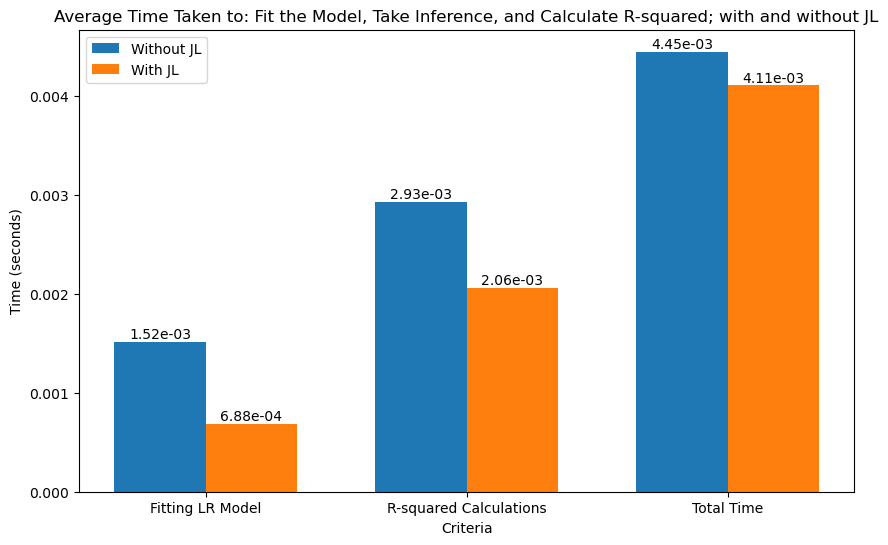

In [107]:
import matplotlib.pyplot as plt
import numpy as np

# Data
criteria = ['Fitting LR Model', 'R-squared Calculations', 'Total Time']
without_JL = [avg_fit_time, avg_r2_time, avg_total_time]
with_JL = [avg_regression_time_JL, avg_scoring_time_JL, avg_total_time_JL]

x = np.arange(len(criteria))  # X-axis positions for the groups
bar_width = 0.35  # Width of the bars

# Plotting the bars
plt.figure(figsize=(10, 6))
bars_without_JL = plt.bar(x - bar_width / 2, without_JL, bar_width, label='Without JL')
bars_with_JL = plt.bar(x + bar_width / 2, with_JL, bar_width, label='With JL')

# Adding scientific notation text on top of each bar
for bar in bars_without_JL:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2e}', ha='center', va='bottom')

for bar in bars_with_JL:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2e}', ha='center', va='bottom')

# Labels and title
plt.xlabel('Criteria')
plt.ylabel('Time (seconds)')
plt.title('Average Time Taken to: Fit the Model, Take Inference, and Calculate R-squared; with and without JL')
plt.xticks(x, criteria)
plt.legend()
plt.show()
